In [0]:
'''
Code to read NIFTI files


'''
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from mpl_toolkits import mplot3d #for 3d plots

import numpy as np
import os
#import pydicom  --installed in colab bia pip
from PIL import Image #for RGB manipulation

#generic toolset for transformations
import scipy.misc
from scipy import ndimage
import scipy.io as sio


# Read Data from google drive
from google.colab import drive #for loading gdrive data
from google.colab import files

# install dependencies not included by Colab
# use pip3 to ensure compatibility w/ Google Deep Learning Images 
!pip3 install -q pydicom 
!pip3 install -q tqdm 
!pip3 install -q imgaug 
!pip3 install -q SimpleITK
!pip3 install -q medpy
!pip3 install nibabel          #NIFTI library support

import SimpleITK as sitk  #for reading mha files
from medpy.io import load #mha files
import pydicom #to read dicom files
import nibabel as nib         #pull in library

#
# Load data from google drive
#

drive.mount('/content/gdrive')


def replace_nan(data, lowval=-1600):
    #a=np.isnan(data)
    #lowval = -1600
    new_data = data #only a slice should be sent in here
    new_data[np.isnan(new_data)]= lowval

    a = np.isnan(new_data)
    #print('sample value after nan replace (0,0) : ',new_data[0,0])
    sdata = new_data #new_data[215:220,145:155,140]
    row,col = np.shape(sdata)
    #print('nan replace shape is ', row,col)

    return sdata


def read_NIFTI():
    print("test")



def find_metal_mass(section, metal_value, depth):
    upper_val = 1.15 #110% of incoming value
    lower_val = 0.85
    row1,col1 = np.shape(section) #section.shape() #should be just one slice
    output_coordinates = set()

    #print('in find_metal_mass, row and col are ',row1, col1)
    for row in range(0,row1):
        for col in range(0,col1):
            #find a voxel that is surrounded on all 4 sides by the 
            #metal_value voxels depth wide
            pixel_x = col
            pixel_y = row

            if ((row - depth) >= 0):
                if ((col - depth) >= 0):
                    #if we're not on the boundaries, check to see if we have 
                    #voxel values around us within 10% of the metal_value

                    #if pixel - col depth : pixel + col depth AND
                    #if pixel - row depth: pixel + row depth are all within the
                    #range for metal, keep this pixel as a possible match

                    avg_cols = np.average(section[row,col-depth:col+depth])
                    avg_rows = np.average(section[row-depth:row+depth,col])
                    #print('row,col: avgc, avgr ', pixel_y, pixel_x,
                    #      avg_cols, avg_rows)
                    if ( (avg_cols >= (lower_val*metal_value) and (avg_cols <= (upper_val*metal_value))) \
                        and \
                        ((avg_rows >= (lower_val*metal_value)) and (avg_cols <= (upper_val*metal_value))) \
                        ):
                        #print('found one pixel')
                        output_coordinates.add((pixel_y, pixel_x))
                    #sum_value = np.sum(section[row-depth:row+depth,col-depth:col+depth])
                    #print('sum_value ',sum_value)
    return output_coordinates



def find_dbs_length(section, metal_value, depth,lower_val=0.7, upper_val=1.15):
    #upper_val = 1.15 #110% of incoming value
    #lower_val = 0.7
    row1,col1 = np.shape(section) #section.shape() #should be just one slice
    output_coordinates = set()

    #print('in find_metal_mass, row and col are ',row1, col1)
    for row in range(0,row1):
        for col in range(0,col1):
            #find a voxel that is diagonally or straight across

            pixel_x = col
            pixel_y = row
            #for each pixel, make sure we can't go out of bounds

            if ((row - depth) >= 0):
                if ( (avg_cols >= (lower_val*metal_value) and (avg_cols <= (upper_val*metal_value))) \
                    and \
                    ((avg_rows >= (lower_val*metal_value)) and (avg_cols <= (upper_val*metal_value))) \
                    ):
                        #print('found one pixel')
                    output_coordinates.add((pixel_y, pixel_x))
                    #sum_value = np.sum(section[row-depth:row+depth,col-depth:col+depth])
                    #print('sum_value ',sum_value)           

    return 0



'''
MAIN CODE SETUP
'''

gdir =           '/content/gdrive/My Drive/BIOENG223A_FALL_2019/data/'
main_directory = gdir

sub_dirs = sorted(os.listdir(main_directory))
print(sub_dirs)

file_dict={}  #hold all of the nii files
path_dict = {}

for ii in range(0,len(sub_dirs)):
    print(sub_dirs[ii])

    current_path = os.path.join(main_directory,sub_dirs[ii])
    file_list = os.listdir(current_path)
    print(file_list)

    extension = '.nii'
    counter = 0    #numbered listing of .nii files found
    for jj in range(len(file_list)):
        if file_list[jj].endswith('.nii'):
            print('found file: ',file_list[jj])


            file_dict[ii,counter]= file_list[jj]
            path_dict[ii,counter] = current_path
            counter = counter + 1


#now we have all the nii files in the folders





#    top_data_dir = '/content/gdrive/My Drive/RCC_DATA/clear_cell/' #data/jpg_train/'
#patient_directories = sorted(os.listdir(top_data_dir))
#clear_cell_dict ={}
#ct_type.append(os.listdir(os.path.join(top_data_dir,ii)))



     |████████████████████████████████| 7.1MB 2.7MB/s 
     |████████████████████████████████| 42.5MB 1.2MB/s 
     |████████████████████████████████| 153kB 2.9MB/s 


filename is  /content/gdrive/My Drive/BIOENG223A_FALL_2019/data/subject_5/preopCT_subject_5.nii


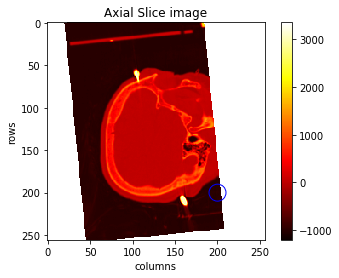

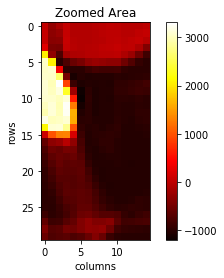

average is  -982.9591967773438
Metal Points Complete
sample value :  -1600.0
shape is  256 256
location returned is  {(210, 159), (214, 162), (61, 105), (209, 160), (213, 161), (60, 104), (208, 161), (209, 159), (212, 160), (211, 163), (210, 160), (61, 104), (208, 159), (62, 105), (60, 105), (212, 161), (207, 161), (58, 104), (211, 162), (206, 160), (205, 159), (210, 161), (206, 158), (60, 106), (212, 162), (207, 160), (207, 159), (58, 105), (61, 107), (209, 162), (213, 163), (62, 106), (205, 158), (59, 105), (211, 160), (211, 161), (63, 106), (206, 159), (212, 163), (210, 162), (207, 158), (61, 106), (209, 161), (213, 162), (62, 107), (208, 160), (59, 104)}
length of loc is  47


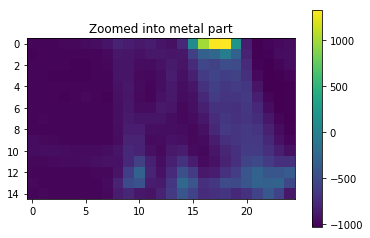

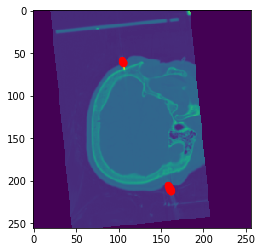

In [0]:
for x in path_dict:
    #print(x,path_dict[x])
    continue
for x in file_dict:
    #print(x, file_dict[x])
    continue
f = os.path.join(path_dict[4,2],file_dict[4,2])
img = nib.load(f)
data = img.get_fdata()

# Show original image
print('filename is ',f)

fig, ax = plt.subplots()
#plt.figure()
#fig = plt.gcf()
#ax = fig.gca()
snum = 134 #axial slicing


plt.imshow(data[:,:,snum],cmap='hot')
plt.xlabel('columns')
plt.ylabel('rows')
plt.title('Axial Slice image')
plt.colorbar()



circle1 = plt.Circle((200,200), 10,color='b', fill=False)
ax.set_aspect(1)
ax.add_artist(circle1)
plt.show()
#fig.savefig('plotcircles.png')
#plot zoomed area of spikes
#plt.figure()


#circle1 = plt.Circle((0, 0), 0.5, color='r')

#
#Zoomed area view
#

fig = plt.gcf()
ax = fig.gca()
plt.imshow(data[200:230,160:175,snum], cmap='hot')
plt.xlabel('columns')
plt.ylabel('rows')
plt.title('Zoomed Area')


plt.colorbar()
plt.show()

data[215,150,140]

sum = np.sum(data[215:220,145:155,snum])
avg = np.average(data[215:220,145:155,140])
print('average is ', avg)


plt.figure()
plt.imshow(data[215:230,145:170,snum])
plt.colorbar()
plt.title('Zoomed into metal part')

#
# Remove any NaN values before running over this data
#
#a=np.isnan(data)
#lowval = -1600
#new_data = data[:,:,snum]
#new_data[np.isnan(new_data)]= lowval

sx,sy,sz = np.shape(data)
metal_points=[]
for ii in range(0,sz):
    new_data = replace_nan(data[:,:,ii], lowval=-1600)   
    #stacked =np.dstack(stacked,new_data)
    loc = find_metal_mass(section = new_data, metal_value = 3000, depth=4)
    metal_points.append(loc)
    if(ii ==0):
        stacked = new_data
    else:
        stacked = np.dstack([stacked,new_data])

print('Metal Points Complete')


'''
Replace NAN
'''
new_data = replace_nan(data[:,:,snum], lowval=-1600)


'''
FIND METAL SPOTS
'''
a = np.isnan(new_data)
print('sample value : ',new_data[0,0])
sdata = new_data #new_data[215:220,145:155,140]
row,col = np.shape(sdata)
print('shape is ', row,col)
loc = find_metal_mass(section = sdata, metal_value = 3000, depth=2)
print('location returned is ',loc)
print('length of loc is ', len(loc))


#
# Redraw full with circles
#
#%matplotlib inline
fig, ax = plt.subplots()
plt.imshow(new_data)
for ii in loc:
    r = ii[0]
    c = ii[1]
    #print('row, col is ', r, c)
    circle1 = plt.Circle((c,r), 3,color='r', fill=False)
    #ax.set_aspect(1)
    ax.add_patch(circle1)
    #ax.add_artist(circle1)
    #plt.hold(True)
plt.show()


In [0]:
numslice=np.shape(metal_points)

print(numslice[0])
for ii in range(0,numslice[0]):
    fig, ax = plt.subplots()
    #plt.figure()
    plt.imshow(stacked[:,:,ii],cmap='gray',vmin=-1600, vmax=3300)
    plt.xlabel('X vox')
    plt.ylabel('Y vox')
    tname = 'Axial Slice #' + np.str(ii)
    plt.title(tname)
    plt.colorbar()
    #plt.show()

    metal_xy = metal_points[ii]
    for ii in metal_xy:
        r = ii[0]
        c = ii[1]
        #print('row, col is ', r, c)
        circle1 = plt.Circle((c,r), 3,color='r', fill=False)
        #ax.set_aspect(1)
        ax.add_patch(circle1)
        #ax.add_artist(circle1)
        #plt.hold(True)
    plt.show()



Output hidden; open in https://colab.research.google.com to view.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 43.,  8., 14.,  6.,  6.,  6.,  3.,
         3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1600.        , -1550.94135254, -1501.88270508, -1452.82405762,
        -1403.76541016, -1354.7067627 , -1305.64811523, -1256.58946777,
        -1207.53082031, -1158.47217285, -1109.41352539, -1060.35487793,
        -1011.29623047,  -962.23758301,  -913.17893555,  -864.12028809,
         -815.06164062,  -766.00299316,  -716.9443457 ,  -667.88569824,
         -618.82705078,  -569.76840332,  -520.70975586,  -471.6511084 ,
  

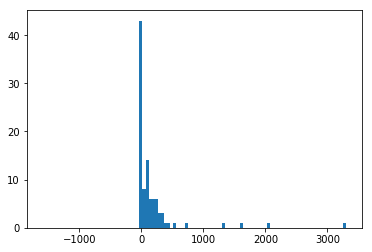

In [0]:
hist,bins=np.histogram(stacked[:,:,140],100)
plt.hist(hist,bins)


/content/gdrive/My Drive/BIOENG223A_FALL_2019/data/subject_5
<class 'dict'>
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Feb  5 16:22:51 2018', '__version__': '1.0', '__globals__': [], 'mask_indices': array([[ -15.5514739 , -114.27784729,  -10.14976215],
       [ -13.55147417, -113.27784729,   -6.14976232],
       [ -14.55147417, -113.27784729,   -6.14976235],
       ...,
       [   1.44852476,   50.72215271,    9.85023729],
       [   3.44852483,   50.72215271,    8.85023742],
       [   2.44852483,   50.72215271,    8.85023738]])}


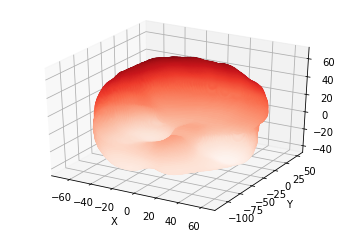

In [0]:
print(current_path)
hull_file_name = 'hull.mat'

hull_file = os.path.join(current_path, hull_file_name)
hull_data = sio.loadmat(hull_file)
print(type(hull_data))
print(hull_data)
mdata =hull_data['mask_indices']
np.shape(mdata)
#mat = scipy.io.loadmat('file.mat')

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = mdata[:,0]
ydata = mdata[:,1]
zdata = mdata[:,2]

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [0]:
'''
Pull DBS locations
'''

for x in path_dict:
    #print(x,path_dict[x])
    continue
for x in file_dict:
    print(x, file_dict[x])
    continue
f = os.path.join(path_dict[4,2],file_dict[4,1])
post_img = nib.load(f)
post_data = post_img.get_fdata()

# Show original image
print('filename is ',f)


sx,sy,sz = np.shape(post_data)
metal_points=[]
for ii in range(0,sz):
    new_data = replace_nan(post_data[:,:,ii], lowval=-1600)   
    #stacked =np.dstack(stacked,new_data)
    loc = find_metal_mass(section = new_data, metal_value = 2800, depth=2)
    metal_points.append(loc)
    if(ii ==0):
        stacked_post = new_data
    else:
        stacked_post = np.dstack([stacked_post,new_data])

print('Metal Points Complete')


'''
Replace NAN
'''
#new_data = replace_nan(data[:,:,snum], lowval=-1600)


(0, 0) hull_subject_1.nii
(0, 1) postopCT_subject_1.nii
(0, 2) preopCT_subject_1.nii
(0, 3) linesMRI4.nii
(1, 0) preopCT_subject_2.nii
(1, 1) postopCT_subject_2.nii
(1, 2) hull_subject_2.nii
(2, 0) hull_subject_3.nii
(2, 1) postopCT_subject_3.nii
(2, 2) preopCT_subject_3.nii
(3, 0) postopCT_subject_4.nii
(3, 1) hull_subject_4.nii
(3, 2) preopCT_subject_4.nii
(4, 0) hull_subject_5.nii
(4, 1) postopCT_subject_5.nii
(4, 2) preopCT_subject_5.nii
filename is  /content/gdrive/My Drive/BIOENG223A_FALL_2019/data/subject_5/postopCT_subject_5.nii
Metal Points Complete


'\nReplace NAN\n'

In [0]:
'''
Show Post-Op stacked images after metal finding
'''
print(metal_points)

numslice=np.shape(metal_points)

print(numslice[0])
for ii in range(0,numslice[0]):
    fig, ax = plt.subplots()
    #plt.figure()
    plt.imshow(stacked_post[:,:,ii],cmap='gray',vmin=-1600, vmax=3300)
    plt.xlabel('X vox')
    plt.ylabel('Y vox')
    tname = 'Post-Op Axial Slice #' + np.str(ii)
    plt.title(tname)
    plt.colorbar()
    #plt.show()

    metal_xy = metal_points[ii]
    for ii in metal_xy:
        r = ii[0]
        c = ii[1]
        #print('row, col is ', r, c)
        circle1 = plt.Circle((c,r), 3,color='r', fill=False)
        #ax.set_aspect(1)
        ax.add_patch(circle1)
        #ax.add_artist(circle1)
        #plt.hold(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [0]:
'''
TRANSFORMATION INFO
'''
#cm = img.coordmap
#print(cm)

strans=img.get_sform()

t=[]
for ii in strans:
    print('transform row is',ii)
    t.append(ii)
print(type(strans))
xrow = strans[0]
yrow = strans[1];
zrow = strans[2];
hrow = strans[3];

tmatrix = [xrow,yrow,zrow,hrow]
print(np.shape(tmatrix))
print(np.shape(xrow))

for row in range(0,256):
    for col in range(0,256):
        vec = [row,col,1,1]
        xnew,ynew,znew,hnew=  np.matmul(tmatrix,vec)
        #print('row,col --> xn,yn,zn,hn', row, col, xnew,ynew,znew,hnew)

print(t[0])
x = t[0]


n1_header = img.header
print(n1_header)

AttributeError: ignored

[[ 0.00000000e+00 -9.41083431e-02  9.91141379e-01 -7.47260590e+01]
 [-1.00000000e+00  0.00000000e+00  0.00000000e+00  1.11722153e+02]
 [ 0.00000000e+00 -9.95561957e-01 -9.36903954e-02  1.35526917e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
('P', 'I', 'R')
caff is  [[ 9.91141379e-01  0.00000000e+00  9.41083431e-02 -9.87236865e+01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.43277847e+02]
 [-9.36903954e-02  0.00000000e+00  9.95561957e-01 -1.18341383e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
New Affine Ordering:  ('R', 'A', 'S')
<class 'numpy.ndarray'>
row, col, slice =  256 256 176
sample value after nan replace (0,0) :  -1600.0
nan replace shape is  256 256
max, min value in slice is  3305.86474609375 -1600.0


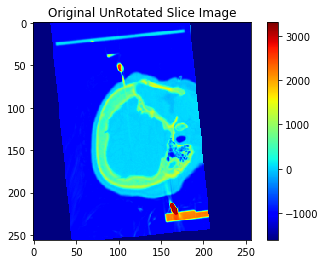

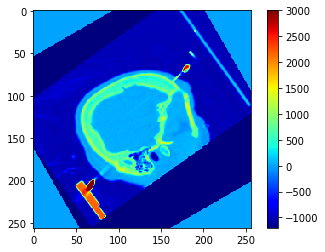

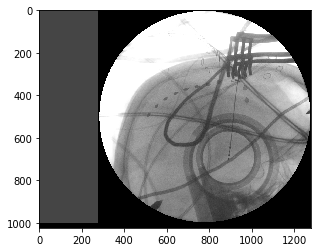

In [0]:
'''
Rotation of CT images to match the Flouro images
'''
#pick a slice, 140 for postOp 5 works well
#f = os.path.join(path_dict[0,0],file_dict[0,1])
ct_img = img #nib.load(f)
data_ct = ct_img.get_fdata()

af=img.affine
print(af)
affax=nib.aff2axcodes(img.affine)
print(affax)
#PIR is Ant to Post, Superior to inferior, Left to Right
canonical_img = nib.as_closest_canonical(img)
caff = canonical_img.affine
print('caff is ',caff)

new_affax=nib.aff2axcodes(canonical_img.affine)
print('New Affine Ordering: ',new_affax)
print(type(caff))
xs = []
ys = []
val = []


for row in range(0,256):
    for col in range(0,256):
        xyz = np.array([[row, col ,1, 1]])
        #print('shape xyz ',np.shape(xyz))
        xyzT=xyz.transpose()
        #print('shape xyz'' ',np.shape(xyzT))
        #print('shape caff is ',np.shape(caff))
     
        newx,newy,newz,H = np.dot(caff,xyzT) #matrix(caff,xyzT)
        xs.append(newx)
        ys.append(newy)

sdata = data_ct[:,:,140]







# Show original image
#print('filename is ',f)

#dir(img)

r,c,z=data_ct.shape
print('row, col, slice = ',r,c,z)
#choose slice number here
snum = 140 #slice number

data_ct_nonan =replace_nan(data_ct[:,:,snum], lowval=-1600)

maxc = np.max(data_ct_nonan[:,:])
minc = np.min(data_ct_nonan[:,:])


print('max, min value in slice is ', maxc, minc)
plt.imshow(data_ct_nonan[:,:],cmap='jet',vmin=-1600, vmax = 3300)
plt.title('Original UnRotated Slice Image')
plt.colorbar()

#rotate image with scipy, don't alter rotated image 
rot_angle = -60 #degrees CCW
rot_img = ndimage.rotate(data_ct[:,:,snum],-60, reshape=False)
plt.figure()
plt.imshow(rot_img,cmap = 'jet',vmin=-1200, vmax = 3000)
plt.colorbar()

f = os.path.join(path_dict[4,2],'fluoro_subject_5.tif')
tiff_file = f
I = plt.imread(tiff_file)
plt.figure()
plt.imshow(I)

In [0]:
a = np.zeros((5,5))
for row in a:

    print('row is ',row)

row is  [0. 0. 0. 0. 0.]
row is  [0. 0. 0. 0. 0.]
row is  [0. 0. 0. 0. 0.]
row is  [0. 0. 0. 0. 0.]
row is  [0. 0. 0. 0. 0.]


In [0]:
metal_value = 3000

print(data.shape)
slice = data[:,:,140]
print("values > metal are ",slice[slice> metal_value])
print("indices to high vals are ",np.nonzero(slice> metal_value))
index = np.nonzero(slice > metal_value)

#
print('length of index is ', len(index))


np.shape(index)
slice[index[0][:],0]
np.isnan(slice[index[0][:]],0)
#plt.imshow(slice[index[0],index[1]])

(256, 256, 176)
values > metal are  [3063.30297852 3118.78833008 3101.57250977 3070.55859375 3144.68457031
 3300.171875   3249.72436523 3227.05981445 3093.0234375  3254.51342773
 3252.26635742 3060.7578125  3255.10107422 3072.50170898 3076.65625
 3047.1003418  3067.92358398 3066.44262695 3049.85888672 3042.45874023
 3109.14331055 3053.97338867 3069.30932617 3078.04248047 3139.12817383
 3033.53564453 3104.95483398 3264.76367188 3084.08618164 3049.13305664
 3088.57324219 3022.17504883 3195.13696289 3112.99047852 3050.89550781
 3086.72167969 3035.65063477 3225.00097656 3001.19458008 3129.42114258
 3266.79467773 3189.83300781 3009.38525391 3125.56591797 3372.46508789
 3160.90600586 3072.53540039 3341.02148438 3248.23022461 3026.5456543
 3017.19458008 3251.84960938 3192.50805664 3094.58764648]
indices to high vals are  (array([ 56,  57,  58,  59,  59,  60,  61,  62,  62,  63,  63,  64,  64,
       213, 213, 213, 214, 214, 214, 214, 215, 215, 215, 215, 216, 216,
       216, 216, 217, 217, 21

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


TypeError: ignored

In [0]:
'''
Get the slices for the dataset that have metallic signatures (highest values)
'''

a=np.isnan(data)
lowval = -1600
new_data = data
new_data[np.isnan(new_data)]=-1600

plt.imshow(new_data[:,:,130],cmap = 'bone')
plt.colorbar()

slice = new_data[:,:,130]

print("values > metal are ",slice[slice> metal_value])
print("indices to high vals are ",np.nonzero(slice> metal_value))

metal_slices = []
num_slices = np.shape(data)[2]
for ii in range(0,num_slices):
    slice = new_data[:,:,ii]
    #print("slice number ",ii)
    values = slice[slice> metal_value]
    
    if (len(values) > 0):
        #print("values > metal are ",slice[slice> metal_value])
        #print("indices to high vals are ",np.nonzero(slice> metal_value))
        plt.figure()
        plt.imshow(slice[:,:], cmap='hot')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(ii)
        plt.colorbar()
        metal_slices.append(ii) #add this slice number to the metal list
        
    else:
        #print('length of values is ', len(values))
        continue


NameError: ignored

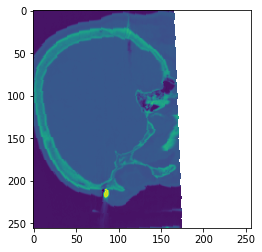

In [0]:
import time
from IPython import display

dsize = data.shape
degree = 5
for xx in range(40,50): #dsize[2]):
    #fig = plt.figure()
    plt.clf()
    #plt.imshow(data[:,:,xx],cmap='bone')
    #plt.colorbar()
    #plt.show()


    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    #time.sleep(0.1)
    tr = transforms.Affine2D().rotate_deg(degree)
    plt.imshow(data[:,:,xx],transform = tr)
    #ax.imshow(img, transform=tr)
    #fig.canvas.draw()
#plt.imshow(data[:,:,150])
#plt.colorbar()






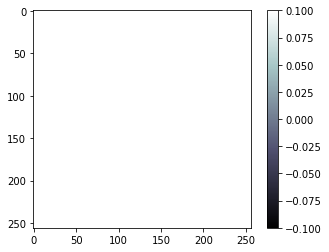

In [0]:
img = data[:,:,120]
rotated_img = ndimage.rotate(img,0.0)
plt.imshow(rotated_img,cmap='bone')
plt.colorbar()
plt.axis('on')
plt.show()

#img2 = scipy.misc.lena()

In [0]:
help(img)

Help on Nifti1Image in module nibabel.nifti1 object:

class Nifti1Image(Nifti1Pair)
 |  Class for single file NIfTI1 format image
 |  
 |  Method resolution order:
 |      Nifti1Image
 |      Nifti1Pair
 |      nibabel.analyze.AnalyzeImage
 |      nibabel.spatialimages.SpatialImage
 |      nibabel.dataobj_images.DataobjImage
 |      nibabel.filebasedimages.FileBasedImage
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  update_header(self)
 |      Harmonize header with image data and affine
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  files_types = (('image', '.nii'),)
 |  
 |  header_class = <class 'nibabel.nifti1.Nifti1Header'>
 |      Class for NIfTI1 header
 |      
 |      The NIfTI1 header has many more coded fields than the simpler Analyze
 |      variants.  NIfTI1 headers also have extensions.
 |      
 |      Nifti allows the header to be a separate file, as part of a nifti im